# Intro to MLFLow I

Learn how to
- Install MLFlow
- Run MLFlow server
- Log parameters, metrics, and artifacts

#### Import MLflow

In [1]:
import mlflow

#### Connect to MLFlow

In [2]:
MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [5]:
# if not working this will raise an exception
experiments = mlflow.search_experiments()

#### Connect to the Experiment

In [3]:
EXPERIMENT_NAME = "My Experiment"

mlflow.set_experiment(EXPERIMENT_NAME)

2025/06/12 16:47:19 INFO mlflow.tracking.fluent: Experiment with name 'My Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/924460574045672699', creation_time=1749746839956, experiment_id='924460574045672699', last_update_time=1749746839956, lifecycle_stage='active', name='My Experiment', tags={}>

#### Create my first run

In [4]:
with mlflow.start_run():
    pass

🏃 View run orderly-toad-440 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/a28d3952fd0949ffb9feae7fd74114d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Log Data into MLFlow

Log Tags

In [15]:
with mlflow.start_run():
    mlflow.set_tag("Model name", "Decision Tree")
    mlflow.set_tag("Author", "Mate")

🏃 View run inquisitive-colt-180 at: http://127.0.0.1:5000/#/experiments/859111263484469035/runs/356c989b863e4c32bbd678a65f9769f5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/859111263484469035


Log Parameters

In [16]:
with mlflow.start_run():
    mlflow.log_param("Test Size", 0.2)


🏃 View run useful-horse-984 at: http://127.0.0.1:5000/#/experiments/859111263484469035/runs/4d4f88c89b22467983a867cffc360234
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/859111263484469035


Log Metrics

In [17]:
with mlflow.start_run():
    mlflow.log_metric("Accuracy", 0.95)


🏃 View run nebulous-quail-982 at: http://127.0.0.1:5000/#/experiments/859111263484469035/runs/835757e207ce4b868f17c98789c21cd4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/859111263484469035


Log parameters, metrics, and tags

In [5]:
TEST_SIZE = 0.3
MODEL = "Decision Tree"

with mlflow.start_run():
    mlflow.set_tag("Model name", MODEL)
    mlflow.log_param("Test Size", TEST_SIZE)
    mlflow.log_metric("Accuracy", 0.95)

🏃 View run resilient-deer-0 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/e54b4e7e46ca4d148672653ed7443298
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Log Artifacts

In [6]:
import numpy as np

X = np.random.rand(100, 1)
y = np.random.rand(100, 1)

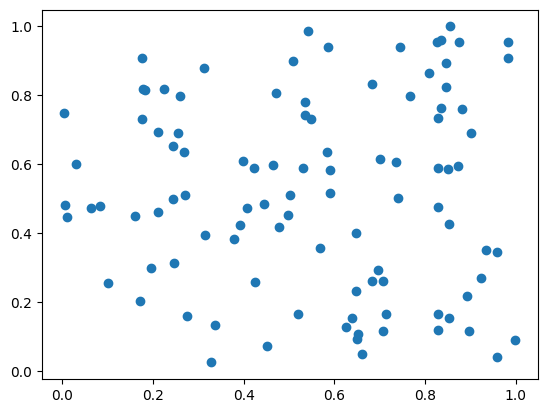

In [8]:
import matplotlib.pyplot as plt

PLOT_PATH = "plot.png"


plt.scatter(X, y)
plt.savefig(PLOT_PATH)

In [10]:
with mlflow.start_run():
    mlflow.log_artifact(PLOT_PATH)

🏃 View run spiffy-rook-44 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/e6516de9e4924fa0a4b1e7aa9346593f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Log Model

In [12]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [ ]:
import mlflow.sklearn


with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")

2025/06/12 17:08:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run persistent-ant-487 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/4a639575b37744e78d76aa37a1c4af5a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Log Model with signature


In [18]:
with mlflow.start_run():
    signature = mlflow.models.infer_signature(model_input=X, model_output=y)
    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run delicate-shark-265 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/73487f80f8bb441aa5206645ff1d917c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Log Dataset

In [20]:
import pandas as pd


df = pd.DataFrame({
    "X": X.flatten(),
    "y": y.flatten()
})

In [23]:
with mlflow.start_run():
    dataset = mlflow.data.from_pandas(df)
    mlflow.log_input(dataset)

🏃 View run bittersweet-wasp-609 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/799bc58e307a4e66b2b1b6cce1bb8248
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699


#### Autolog

In [24]:
mlflow.autolog()

2025/06/12 17:29:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [ ]:
with mlflow.start_run():
    model.fit(X, y)
    model.predict(X)

🏃 View run rumbling-lark-970 at: http://127.0.0.1:5000/#/experiments/924460574045672699/runs/ab97b42fb9d64871b8504bf304df6818
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924460574045672699
